## Load the python libraries

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [230]:
df_raw = pd.read_csv("C:/Users/mahan.hadjizadeh/Documents/Projects/LTV Model/LTV_Model_Raw.csv")
print df_raw.head()

   registered_user_id gender  age  previous_subscription_count  \
0               62384      m   43                            1   
1               62850      m   33                            1   
2               64094      m   29                            2   
3               66282      m   52                            0   
4               71566      m   37                            0   

  initial_product      channel        subchannel    partner  \
0            NOAH  Partnership               OEM  Microsoft   
1            NOAH  Partnership               OEM      Apple   
2            NOAH         Hulu             Email       Hulu   
3            NOAH         Hulu  Non-Attributable        NaN   
4            SASH  Partnership               OEM      Apple   

                  subpartner  num_dev      ...       avg_min_watched_day  \
0                   Xbox One        1      ...                 87.277730   
1                   Apple TV        1      ...                118.213255

In [231]:
df_raw.describe()

,registered_user_id,age,previous_subscription_count,num_dev,perc_lv_dev,perc_computer_dev,perc_mobile_tablet_dev,tot_min_watched,tot_ad_min_watched,avg_min_watched_day,avg_ad_min_watched_day,tot_vid_watched,tot_unq_vid_watched,avg_vid_watched_day,avg_unq_vid_watched_day,avg_playback_viewthru_perc,avg_ad_viewthru_perc,perc_active_days
count,9.159050e+05,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915905.000000,915448.000000,915448.000000,915905.000000
mean,7.666872e+07,34.230064,0.153885,1.673701,0.563132,0.169158,0.250199,1633.740572,68.235266,164.521604,7.004106,68.732148,44.773229,6.968833,4.642326,63.495445,253.818017,0.512466
std,1.701553e+07,12.917872,0.554805,0.959542,0.460226,0.349131,0.394522,2142.490511,140.493718,151.341454,11.335139,90.511075,60.530914,6.271134,4.441896,142.791706,360.883373,0.313499
min,6.238400e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
25%,8.270912e+07,25.000000,0.000000,1.000000,0.000000,0.000000,0.000000,245.084900,0.000000,63.199190,0.000000,11.000000,7.000000,3.000000,1.857143,49.989056,0.000000,0.200000
50%,8.308524e+07,31.000000,0.000000,1.000000,0.833053,0.000000,0.000000,855.485750,6.042000,123.247994,1.286733,36.000000,22.000000,5.142857,3.285714,66.377580,62.112116,0.466667
75%,8.347351e+07,41.000000,0.000000,2.000000,1.000000,0.021639,0.426523,2168.537800,72.595333,218.864583,10.155185,91.000000,58.000000,9.000000,6.000000,78.768650,438.463789,0.800000
max,8.388653e+07,147.000000,37.000000,13.000000,1.000000,1.000000,1.000000,44240.249670,2716.205767,2949.349978,351.446283,1694.000000,1206.000000,363.000000,363.000000,69625.737000,41613.784510,1.000000


In [232]:
df_raw.count()

registered_user_id             915905
gender                         915905
age                            915905
previous_subscription_count    915905
initial_product                915905
channel                        915067
subchannel                     847029
partner                        471851
subpartner                     307441
num_dev                        915905
perc_lv_dev                    915905
perc_computer_dev              915905
perc_mobile_tablet_dev         915905
tot_min_watched                915905
tot_ad_min_watched             915905
avg_min_watched_day            915905
avg_ad_min_watched_day         915905
tot_vid_watched                915905
tot_unq_vid_watched            915905
avg_vid_watched_day            915905
avg_unq_vid_watched_day        915905
avg_playback_viewthru_perc     915448
avg_ad_viewthru_perc           915448
perc_active_days               915905
segment                        915905
dtype: int64

In [233]:
df_raw.nunique()

registered_user_id             915905
gender                              4
age                               135
previous_subscription_count        28
initial_product                     4
channel                             3
subchannel                         19
partner                            72
subpartner                         28
num_dev                            13
perc_lv_dev                    266249
perc_computer_dev              144647
perc_mobile_tablet_dev         247197
tot_min_watched                890447
tot_ad_min_watched             525505
avg_min_watched_day            891762
avg_ad_min_watched_day         552530
tot_vid_watched                  1043
tot_unq_vid_watched               730
avg_vid_watched_day              3642
avg_unq_vid_watched_day          2786
avg_playback_viewthru_perc     898455
avg_ad_viewthru_perc           573037
perc_active_days                   15
segment                             4
dtype: int64

In [234]:
df_raw.gender.unique()

array(['m', 'f', '0', 'null'], dtype=object)

In [235]:
##df_raw.groupby(['gender']).count()
df_raw.gender.value_counts()

f       450667
m       372969
0        91556
null       713
Name: gender, dtype: int64

In [236]:
df_raw=df_raw[df_raw.gender != 'null']
df_raw=df_raw[df_raw.gender != '0']
df_raw.gender.unique()

array(['m', 'f'], dtype=object)

In [237]:
df_raw.age.unique()

array([ 43,  33,  29,  52,  37,  34,  46,  36,  60,  38,  39,  51,  76,
        53,  56, 112,  47,  49,  40,  66,  69,  58,  35,  42,  59,  45,
        48,  30,  26,  68,  28,  32,  57,  31,  41,  44,  62,  61,  50,
        24,  72,  73,  54,  64,  65,  25,  27,  74,  71,  55,  23,  67,
        63, 102,  70,  22, 115, 111, 105,  88, 116,  80,  81,  78,  97,
       108,  77,  84,  93, 107,  95,  86,  75,  21,  96,  90,  94,  89,
       135, 137, 134, 101, 143, 133, 122, 131, 136, 145, 130, 146, 140,
       132, 147, 123, 125, 138, 128, 129, 142, 124, 126, 141,  79, 139,
        91, 144, 127,  83,  20,  87, 106,  82, 103, 117, 109, 113, 104,
       114, 100, 110,  85,  19,  92,  98,   0,  18,  99,  17,  14,  15,
        16, 121, 118, 119, 120], dtype=int64)

In [238]:
#df_raw=df_raw[df_raw.age > 0 & df_raw.age < 91]
df_raw = df_raw[df_raw.age > 0]
df_raw = df_raw[df_raw.age < 91]
df_raw.age.unique()

array([43, 33, 29, 52, 37, 34, 46, 36, 60, 38, 39, 51, 76, 53, 56, 47, 49,
       40, 66, 69, 58, 35, 42, 59, 45, 48, 30, 26, 68, 28, 32, 57, 31, 41,
       44, 62, 61, 50, 24, 72, 73, 54, 64, 65, 25, 27, 74, 71, 55, 23, 67,
       63, 70, 22, 88, 80, 81, 78, 77, 84, 86, 75, 21, 90, 89, 79, 83, 20,
       87, 82, 85, 19, 18, 17, 14, 15, 16], dtype=int64)

In [239]:
df_raw['channel'].unique()

array(['Partnership', 'Hulu', 'Paid Media', nan], dtype=object)

In [240]:
df_raw['channel'] = df_raw['channel'].fillna('N_A')
df_raw['channel'].unique()

array(['Partnership', 'Hulu', 'Paid Media', 'N_A'], dtype=object)

In [241]:
df_raw['channel'] = df_raw['channel'].replace(['Paid Media'], 'Paid_Media')
df_raw['channel'].unique()

array(['Partnership', 'Hulu', 'Paid_Media', 'N_A'], dtype=object)

In [242]:
df_raw.subchannel.unique()

array(['OEM', 'Email', 'Non-Attributable', 'Masthead', 'Other', 'SEM',
       'Strategic', nan, 'Display', 'Site Promo', 'TV', 'Audio',
       'Distribution Partner', 'Social', 'Affiliate', 'MVPD', 'House Ad',
       'Mobile', 'Referral', 'Virtual Gift Card'], dtype=object)

In [243]:
df_raw['subchannel'] = df_raw['subchannel'].fillna('N_A')
df_raw['subchannel'].unique()

array(['OEM', 'Email', 'Non-Attributable', 'Masthead', 'Other', 'SEM',
       'Strategic', 'N_A', 'Display', 'Site Promo', 'TV', 'Audio',
       'Distribution Partner', 'Social', 'Affiliate', 'MVPD', 'House Ad',
       'Mobile', 'Referral', 'Virtual Gift Card'], dtype=object)

In [244]:
df_raw['subchannel'] = df_raw['subchannel'].replace(['Non-Attributable'], 'Non_Attributable')
df_raw['subchannel'] = df_raw['subchannel'].replace(['Site Promo'], 'Site_Promo')
df_raw['subchannel'] = df_raw['subchannel'].replace(['Distribution Partner'], 'Distribution_Partner')
df_raw['subchannel'] = df_raw['subchannel'].replace(['House Ad'], 'House_Ad')
df_raw['subchannel'] = df_raw['subchannel'].replace(['Virtual Gift Card'], 'Virtual_Gift_Card')
df_raw['subchannel'].unique()

array(['OEM', 'Email', 'Non_Attributable', 'Masthead', 'Other', 'SEM',
       'Strategic', 'N_A', 'Display', 'Site_Promo', 'TV', 'Audio',
       'Distribution_Partner', 'Social', 'Affiliate', 'MVPD', 'House_Ad',
       'Mobile', 'Referral', 'Virtual_Gift_Card'], dtype=object)

In [245]:
df_raw.partner.unique()

array(['Microsoft', 'Apple', 'Hulu', nan, 'Amazon', 'Roku',
       'American Express', 'Google', 'Sony', 'Samsung', 'Earwolf', 'CBSi',
       'Tapjoy', 'Suddenlink', 'Panasonic', 'Cablevision', 'Nintendo',
       'Rocketfuel', 'SideReel', 'Oculus', 'Vizio', 'Barnes and Noble',
       'LG', 'Truview Mobile', 'Midcontinent', 'Philips', 'Mediacom',
       'Gamefly', 'Yidio', 'RTPodNet', 'Toshiba', 'Quantcast', 'JARA',
       'Enseo', 'DBM', 'TVLinks', 'Criterion', 'AAFES', 'Sharp',
       'Facebook', 'MidRoll', 'Netgear', 'TV Guide', 'Commission Junction',
       'AdMob', 'AMC Networks', 'RadiumOne', 'NBC', 'Vevo',
       'Western Digital', 'Yahoo', 'Dstillery', 'Maximum Fun Network',
       'Trialpay', 'PodcastOne', 'Neon Alley', 'Video Podcast Network',
       'Star Talk', 'NCTC', 'AT&T', 'Best Buy', 'Armstrong',
       'Carolla Digital', 'GCI', 'Bonnier', 'YouTube', 'NCircle',
       'Exponential', 'Tivo', 'Smodcast', 'Funai', 'HowStuffWorks', 'Dynex'], dtype=object)

In [246]:
df_raw['partner'] = df_raw['partner'].fillna('N_A')
df_raw['partner'].unique()

array(['Microsoft', 'Apple', 'Hulu', 'N_A', 'Amazon', 'Roku',
       'American Express', 'Google', 'Sony', 'Samsung', 'Earwolf', 'CBSi',
       'Tapjoy', 'Suddenlink', 'Panasonic', 'Cablevision', 'Nintendo',
       'Rocketfuel', 'SideReel', 'Oculus', 'Vizio', 'Barnes and Noble',
       'LG', 'Truview Mobile', 'Midcontinent', 'Philips', 'Mediacom',
       'Gamefly', 'Yidio', 'RTPodNet', 'Toshiba', 'Quantcast', 'JARA',
       'Enseo', 'DBM', 'TVLinks', 'Criterion', 'AAFES', 'Sharp',
       'Facebook', 'MidRoll', 'Netgear', 'TV Guide', 'Commission Junction',
       'AdMob', 'AMC Networks', 'RadiumOne', 'NBC', 'Vevo',
       'Western Digital', 'Yahoo', 'Dstillery', 'Maximum Fun Network',
       'Trialpay', 'PodcastOne', 'Neon Alley', 'Video Podcast Network',
       'Star Talk', 'NCTC', 'AT&T', 'Best Buy', 'Armstrong',
       'Carolla Digital', 'GCI', 'Bonnier', 'YouTube', 'NCircle',
       'Exponential', 'Tivo', 'Smodcast', 'Funai', 'HowStuffWorks', 'Dynex'], dtype=object)

In [247]:
df_raw['partner'] = df_raw['partner'].replace(['American Express'], 'American_Express')
df_raw['partner'] = df_raw['partner'].replace(['Barnes and Noble'], 'Barnes_and_Noble')
df_raw['partner'] = df_raw['partner'].replace(['Truview Mobile'], 'Truview_Mobile')
df_raw['partner'] = df_raw['partner'].replace(['TV Guide'], 'TV_Guide')
df_raw['partner'] = df_raw['partner'].replace(['Commission Junction'], 'Commission_Junction')
df_raw['partner'] = df_raw['partner'].replace(['AMC Networks'], 'AMC_Networks')
df_raw['partner'] = df_raw['partner'].replace(['Western Digital'], 'Western_Digital')
df_raw['partner'] = df_raw['partner'].replace(['Maximum Fun Network'], 'Maximum_Fun_Network')
df_raw['partner'] = df_raw['partner'].replace(['Neon Alley'], 'Neon_Alley')
df_raw['partner'] = df_raw['partner'].replace(['Video Podcast Network'], 'Video_Podcast_Network')
df_raw['partner'] = df_raw['partner'].replace(['Star Talk'], 'Star_Talk')
df_raw['partner'] = df_raw['partner'].replace(['AT&T'], 'ATT')
df_raw['partner'] = df_raw['partner'].replace(['Best Buy'], 'Best_Buy')
df_raw['partner'] = df_raw['partner'].replace(['Carolla Digital'], 'Carolla_Digital')
df_raw['partner'].unique()

array(['Microsoft', 'Apple', 'Hulu', 'N_A', 'Amazon', 'Roku',
       'American_Express', 'Google', 'Sony', 'Samsung', 'Earwolf', 'CBSi',
       'Tapjoy', 'Suddenlink', 'Panasonic', 'Cablevision', 'Nintendo',
       'Rocketfuel', 'SideReel', 'Oculus', 'Vizio', 'Barnes_and_Noble',
       'LG', 'Truview_Mobile', 'Midcontinent', 'Philips', 'Mediacom',
       'Gamefly', 'Yidio', 'RTPodNet', 'Toshiba', 'Quantcast', 'JARA',
       'Enseo', 'DBM', 'TVLinks', 'Criterion', 'AAFES', 'Sharp',
       'Facebook', 'MidRoll', 'Netgear', 'TV_Guide', 'Commission_Junction',
       'AdMob', 'AMC_Networks', 'RadiumOne', 'NBC', 'Vevo',
       'Western_Digital', 'Yahoo', 'Dstillery', 'Maximum_Fun_Network',
       'Trialpay', 'PodcastOne', 'Neon_Alley', 'Video_Podcast_Network',
       'Star_Talk', 'NCTC', 'ATT', 'Best_Buy', 'Armstrong',
       'Carolla_Digital', 'GCI', 'Bonnier', 'YouTube', 'NCircle',
       'Exponential', 'Tivo', 'Smodcast', 'Funai', 'HowStuffWorks', 'Dynex'], dtype=object)

In [248]:
df_raw.subpartner.unique()

array(['Xbox One', 'Apple TV', 'Reacquisition / Retention', nan, 'iOS',
       'Amazon Fire TV', 'Windows', 'Plenti', 'PS4', 'Amazon Kindle',
       'Bing', 'PS3', 'EWolf', 'BIVL', 'Xbox 360', 'WiiU', 'Nook', 'Wii U',
       'Wii', 'Rooster Teeth', 'PS Vita', 'Non-attributable', 'OperaTV',
       '3DS', 'Nexus Player', 'Norm MacDonald', 'Grande', 'Alison Rosen',
       'TESD'], dtype=object)

In [249]:
df_raw['subpartner'] = df_raw['subpartner'].fillna('N_A')
df_raw['subpartner'].unique()

array(['Xbox One', 'Apple TV', 'Reacquisition / Retention', 'N_A', 'iOS',
       'Amazon Fire TV', 'Windows', 'Plenti', 'PS4', 'Amazon Kindle',
       'Bing', 'PS3', 'EWolf', 'BIVL', 'Xbox 360', 'WiiU', 'Nook', 'Wii U',
       'Wii', 'Rooster Teeth', 'PS Vita', 'Non-attributable', 'OperaTV',
       '3DS', 'Nexus Player', 'Norm MacDonald', 'Grande', 'Alison Rosen',
       'TESD'], dtype=object)

In [250]:
df_raw['subpartner'] = df_raw['subpartner'].replace(['Xbox One'], 'Xbox_One')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Apple TV'], 'Apple_TV')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Reacquisition / Retention'], 'Reacquisition_Retention')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Amazon Fire TV'], 'Amazon_Fire_TV')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Amazon Kindle'], 'Amazon_Kindle')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Xbox 360'], 'Xbox_360')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Wii U'], 'Wii_U')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Rooster Teeth'], 'Rooster_Teeth')
df_raw['subpartner'] = df_raw['subpartner'].replace(['PS Vita'], 'PS_Vita')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Non-attributable'], 'Non_attributable')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Nexus Player'], 'Nexus_Player')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Norm MacDonald'], 'Norm_MacDonald')
df_raw['subpartner'] = df_raw['subpartner'].replace(['Alison Rosen'], 'Alison_Rosen')
df_raw['subpartner'].unique()

array(['Xbox_One', 'Apple_TV', 'Reacquisition_Retention', 'N_A', 'iOS',
       'Amazon_Fire_TV', 'Windows', 'Plenti', 'PS4', 'Amazon_Kindle',
       'Bing', 'PS3', 'EWolf', 'BIVL', 'Xbox_360', 'WiiU', 'Nook', 'Wii_U',
       'Wii', 'Rooster_Teeth', 'PS_Vita', 'Non_attributable', 'OperaTV',
       '3DS', 'Nexus_Player', 'Norm_MacDonald', 'Grande', 'Alison_Rosen',
       'TESD'], dtype=object)

In [251]:
df_raw.avg_playback_viewthru_perc.isnull().sum()

448

In [252]:
df_raw.avg_ad_viewthru_perc.isnull().sum()

448

In [253]:
df_raw.perc_lv_dev.unique()

array([ 1.        ,  0.        ,  0.13467722, ...,  0.82573675,
        0.7974679 ,  0.64178318])

In [254]:
df_raw.count()

registered_user_id             822016
gender                         822016
age                            822016
previous_subscription_count    822016
initial_product                822016
channel                        822016
subchannel                     822016
partner                        822016
subpartner                     822016
num_dev                        822016
perc_lv_dev                    822016
perc_computer_dev              822016
perc_mobile_tablet_dev         822016
tot_min_watched                822016
tot_ad_min_watched             822016
avg_min_watched_day            822016
avg_ad_min_watched_day         822016
tot_vid_watched                822016
tot_unq_vid_watched            822016
avg_vid_watched_day            822016
avg_unq_vid_watched_day        822016
avg_playback_viewthru_perc     821568
avg_ad_viewthru_perc           821568
perc_active_days               822016
segment                        822016
dtype: int64

In [255]:
df_raw.nunique()

registered_user_id             822016
gender                              2
age                                77
previous_subscription_count        28
initial_product                     4
channel                             4
subchannel                         20
partner                            73
subpartner                         29
num_dev                            13
perc_lv_dev                    240746
perc_computer_dev              136253
perc_mobile_tablet_dev         220515
tot_min_watched                799483
tot_ad_min_watched             470115
avg_min_watched_day            800604
avg_ad_min_watched_day         494003
tot_vid_watched                  1036
tot_unq_vid_watched               725
avg_vid_watched_day              3599
avg_unq_vid_watched_day          2755
avg_playback_viewthru_perc     805785
avg_ad_viewthru_perc           512017
perc_active_days                   15
segment                             4
dtype: int64

# Do not use avg_playback_viewthru_perc & avg_ad_viewthru_perc
# Numbers don't look correct

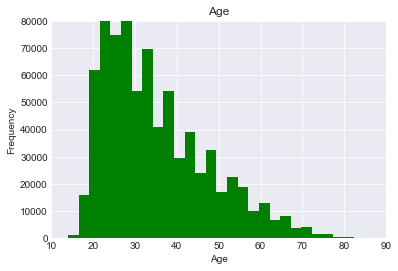

In [257]:
plt.hist(df_raw['age'], 30, histtype = 'bar', facecolor='green')
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.title("Age")
plt.axis([10,90,0,80000])
plt.show()

In [258]:
df_raw.previous_subscription_count.value_counts()

0     729508
1      67225
2      16665
3       4995
4       1957
5        790
6        374
7        212
8        113
9         47
10        36
11        29
12        17
13        10
14        10
15         8
16         5
17         3
18         2
22         2
36         1
20         1
21         1
23         1
26         1
27         1
28         1
37         1
Name: previous_subscription_count, dtype: int64

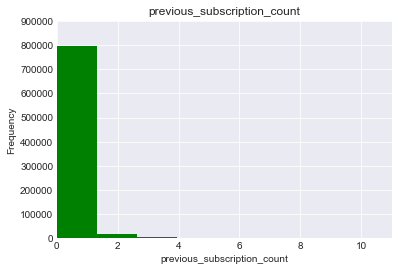

In [259]:
plt.hist(df_raw['previous_subscription_count'], 28, histtype = 'bar', facecolor='green')
plt.ylabel("Frequency")
plt.xlabel("previous_subscription_count")
plt.title("previous_subscription_count")
plt.axis([0,11,0,900000])
plt.show()

In [260]:
df_raw.num_dev.value_counts()

1     463092
2     223359
3      90498
4      31257
5       9724
6       2882
7        870
8        229
9         79
10        18
11         4
13         2
12         2
Name: num_dev, dtype: int64

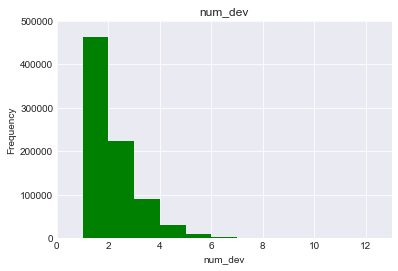

In [261]:
plt.hist(df_raw['num_dev'], 12, histtype = 'bar', facecolor='green')
plt.ylabel("Frequency")
plt.xlabel("num_dev")
plt.title("num_dev")
plt.axis([0,13,0,500000])
plt.show()

In [262]:
df_raw.perc_active_days.value_counts()

0.066667    87601
1.000000    81094
0.133333    66736
0.200000    56963
0.933333    56642
0.266667    52686
0.333333    49527
0.866667    49509
0.400000    47494
0.800000    46622
0.466667    46573
0.533333    45597
0.733333    45160
0.600000    45045
0.666667    44767
Name: perc_active_days, dtype: int64

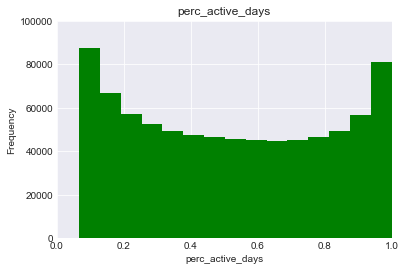

In [263]:
plt.hist(df_raw['perc_active_days'], 15, histtype = 'bar', facecolor='green')
plt.ylabel("Frequency")
plt.xlabel("perc_active_days")
plt.title("perc_active_days")
plt.axis([0,1,0,100000])
plt.show()

In [264]:
df_raw.segment.value_counts()

promo_expire    251062
high_12+        241085
low_0-6         215573
mid_6-12        114296
Name: segment, dtype: int64

In [265]:
#corr=df_raw.corr()
#plt.matshow(df_raw.corr())
#df_raw['age','previous_subscription_count'].corr()

corr=df_raw.loc[:,['age','previous_subscription_count']].corr()
plt.matshow(df_raw.corr())

##f, ax = plt.subplots(figsize=(10, 8))
#corr=df_raw['age','previous_subscription_count'].corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
 #           square=True, ax=ax)

In [223]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

##correlations = df_raw[['age', 'previous_subscription_count', 'num_dev']].corr()
correlations = df_raw.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

                             registered_user_id       age  \
registered_user_id                     1.000000 -0.082028   
age                                   -0.082028  1.000000   
previous_subscription_count           -0.395860  0.023045   
num_dev                               -0.006038 -0.025004   
perc_lv_dev                            0.027886  0.069973   
perc_computer_dev                     -0.033975 -0.076964   
perc_mobile_tablet_dev                -0.003097 -0.013674   
tot_min_watched                        0.040939 -0.059134   
tot_ad_min_watched                     0.002715 -0.055010   
avg_min_watched_day                    0.043383 -0.041250   
avg_ad_min_watched_day                -0.007585 -0.051522   
tot_vid_watched                        0.036303 -0.080542   
tot_unq_vid_watched                    0.031563 -0.073388   
avg_vid_watched_day                    0.036766 -0.064425   
avg_unq_vid_watched_day                0.028044 -0.050189   
avg_playback_viewthru_pe

In [271]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
#from sklearn.cross_validation import cross_val_score

X = df_raw[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw['segment']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

#scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
#CV = ms.cross_validate(model, X, y, cv=5, scoring=['roc_auc','accuracy'])
CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])

In [272]:
print CV

{'score_time': array([ 4.89199996,  3.06100011,  4.05700016,  4.01099992,  2.57400012]), 'fit_time': array([ 102.61399984,  101.38100004,   81.92799997,   88.20200014,
         80.52799988]), 'train_accuracy': array([ 0.99582124,  0.99575738,  0.99573761,  0.99584255,  0.99585319]), 'test_accuracy': array([ 0.35060977,  0.35359845,  0.35062012,  0.35484362,  0.35430226])}


In [270]:
dummy_segment = pd.get_dummies(df_raw['segment'])
#print dummy_segment
df_raw2 = df_raw.loc[:,'registered_user_id':].join(dummy_segment.loc[:, 'high_12+':])
print df_raw2.head()

   registered_user_id gender  age  previous_subscription_count  \
0               62384      m   43                            1   
1               62850      m   33                            1   
2               64094      m   29                            2   
3               66282      m   52                            0   
4               71566      m   37                            0   

  initial_product      channel        subchannel    partner  \
0            NOAH  Partnership               OEM  Microsoft   
1            NOAH  Partnership               OEM      Apple   
2            NOAH         Hulu             Email       Hulu   
3            NOAH         Hulu  Non_Attributable        N_A   
4            SASH  Partnership               OEM      Apple   

                subpartner  num_dev      ...       avg_vid_watched_day  \
0                 Xbox_One        1      ...                  2.400000   
1                 Apple_TV        1      ...                  5.857143   
2 

In [274]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw2['promo_expire']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

#scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
#CV = ms.cross_validate(model, X, y, cv=5, scoring=['roc_auc','accuracy'])
CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 1.68099999,  3.61100006,  1.77699995,  1.73100019,  3.76300001]), 'fit_time': array([  53.33699989,   85.53199983,  100.08200002,   77.64299989,
         80.45799994]), 'train_accuracy': array([ 0.99128361,  0.99155733,  0.99136422,  0.99133989,  0.99129429]), 'test_accuracy': array([ 0.69110241,  0.69413153,  0.69010298,  0.69639848,  0.69593436])}


In [275]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw2['low_0-6']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

#scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
#CV = ms.cross_validate(model, X, y, cv=5, scoring=['roc_auc','accuracy'])
CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 1.73699999,  2.99399996,  2.73800015,  3.0710001 ,  1.95299983]), 'fit_time': array([  93.03800011,   89.82599998,   96.39499998,  169.16999984,
        112.85300016]), 'train_accuracy': array([ 0.99161208,  0.99173981,  0.9917535 ,  0.99199378,  0.99186909]), 'test_accuracy': array([ 0.71997032,  0.72157003,  0.71820637,  0.72224182,  0.72204718])}


In [276]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw2['mid_6-12']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

#scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
#CV = ms.cross_validate(model, X, y, cv=5, scoring=['roc_auc','accuracy'])
CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 2.35300016,  1.6730001 ,  1.58899999,  1.6789999 ,  2.76300001]), 'fit_time': array([ 103.34099984,   94.16199994,   64.91300011,   78.57500005,
         84.69400001]), 'train_accuracy': array([ 0.99049592,  0.99070274,  0.99085632,  0.9905674 ,  0.99068905]), 'test_accuracy': array([ 0.85882947,  0.85858531,  0.8586583 ,  0.85843324,  0.85872521])}


In [277]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw2['high_12+']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

#scores = cross_val_score(model, X, y, scoring='accuracy', cv=5)
#CV = ms.cross_validate(model, X, y, cv=5, scoring=['roc_auc','accuracy'])
CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 2.28399992,  4.10400009,  2.69300008,  4.24699998,  1.671     ]), 'fit_time': array([  98.5539999 ,  109.60699987,   85.29900002,   89.69400001,
         92.60299993]), 'train_accuracy': array([ 0.99360109,  0.99375621,  0.99366345,  0.9936011 ,  0.99362999]), 'test_accuracy': array([ 0.69456339,  0.68919667,  0.69395936,  0.69080856,  0.68822953])}


In [278]:
from sklearn import datasets, neighbors, metrics
#import pandas as pd

X = df_raw[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw['segment']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X, y)
print knn.score(X, y)

0.532779167315


In [279]:
X = df_raw[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw['segment']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X, y)
print knn.score(X, y)

0.996675247197


In [280]:
CV = ms.cross_validate(knn, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 24.1559999 ,  12.52099991,  21.90300012,  12.43700004,  12.68499994]), 'fit_time': array([ 8.16400003,  4.0309999 ,  4.56599998,  3.88100004,  4.5250001 ]), 'train_accuracy': array([ 0.99705601,  0.99714269,  0.99694349,  0.99707275,  0.99724458]), 'test_accuracy': array([ 0.31416319,  0.31838641,  0.3145563 ,  0.32007518,  0.31792801])}


In [282]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days']]
y = df_raw2['promo_expire']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X, y)

CV = ms.cross_validate(knn, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 17.88000011,  19.45099998,  29.30999994,  25.19299984,  19.83500004]), 'fit_time': array([ 5.296     ,  3.88699985,  5.83800006,  4.75      ,  3.56799984]), 'train_accuracy': array([ 0.99739512,  0.99733429,  0.99667738,  0.99703473,  0.99732366]), 'test_accuracy': array([ 0.65831732,  0.66246563,  0.65895391,  0.66365577,  0.66316103])}


In [324]:
dummy_channel = pd.get_dummies(df_raw['channel'], prefix='channel')
dummy_subchannel = pd.get_dummies(df_raw['subchannel'], prefix='subchannel')
dummy_partner = pd.get_dummies(df_raw['partner'], prefix='partner')
dummy_subpartner = pd.get_dummies(df_raw['subpartner'], prefix='subpartner')
dummy_product = pd.get_dummies(df_raw['initial_product'], prefix='product')
#print dummy_product.head()
df_raw2 = df_raw2.loc[:,'registered_user_id':].join(dummy_channel.loc[:, 'channel_Hulu':]).join(dummy_subchannel.loc[:, 'subchannel_Affiliate':]).join(dummy_partner.loc[:, 'partner_AAFES':]).join(dummy_subpartner.loc[:, 'subpartner_3DS':]).join(dummy_subpartner.loc[:, 'product_NOAH':])
print df_raw2.head()
#df_raw2.drop(['channel_Partnership','subchannel_Virtual_Gift_Card','partner_YouTube','subpartner_iOS'], axis=1, inplace=True)
#df_raw2.count()

   registered_user_id gender  age  previous_subscription_count  \
0               62384      m   43                            1   
1               62850      m   33                            1   
2               64094      m   29                            2   
3               66282      m   52                            0   
4               71566      m   37                            0   

  initial_product      channel        subchannel    partner  \
0            NOAH  Partnership               OEM  Microsoft   
1            NOAH  Partnership               OEM      Apple   
2            NOAH         Hulu             Email       Hulu   
3            NOAH         Hulu  Non_Attributable        N_A   
4            SASH  Partnership               OEM      Apple   

                subpartner  num_dev          ...            subpartner_WiiU  \
0                 Xbox_One        1          ...                          0   
1                 Apple_TV        1          ...                  

In [311]:
type(df_raw2.loc[:, 'channel_Hulu':])

pandas.core.frame.DataFrame

In [312]:
X = df_raw2.loc[:, 'channel_Hulu':]
y = df_raw['segment']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])

In [313]:
print CV

{'score_time': array([ 0.6559999 ,  0.70899987,  0.7249999 ,  0.69499993,  0.70700002]), 'fit_time': array([ 17.00900006,  15.85700011,  16.20900011,  16.75200009,  16.14999986]), 'train_accuracy': array([ 0.32996863,  0.33461981,  0.32973953,  0.33418388,  0.33395426]), 'test_accuracy': array([ 0.33605426,  0.32122089,  0.33692208,  0.32299485,  0.32385859])}


In [315]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
75,partner_Roku,0.106702
116,subpartner_Reacquisition_Retention,0.098616
106,subpartner_N_A,0.093923
125,subpartner_iOS,0.062848
30,partner_Apple,0.051717
28,partner_Amazon,0.048082
8,subchannel_Email,0.046766
76,partner_Samsung,0.041184
3,channel_Partnership,0.030034
15,subchannel_OEM,0.028796


In [318]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days','partner_Roku','subpartner_Reacquisition_Retention','subpartner_N_A','subpartner_iOS','partner_Apple','partner_Amazon','subchannel_Email','partner_Samsung','channel_Partnership','subchannel_OEM','partner_N_A','subchannel_N_A','channel_Hulu','subpartner_Xbox_One','partner_Tapjoy','subchannel_Non_Attributable','subpartner_Apple_TV','subpartner_Amazon_Kindle','partner_Vizio','subpartner_Amazon_Fire_TV','subchannel_Affiliate']]
y = df_raw2['segment']

model = RandomForestClassifier(n_estimators = 20)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([ 4.37000012,  3.37200022,  3.89599991,  3.76999998,  2.79299998]), 'fit_time': array([ 111.55800009,   90.33999991,  118.48800015,  128.58200002,
         93.10500002]), 'train_accuracy': array([ 0.99632001,  0.9965101 ,  0.99648121,  0.99642191,  0.99645993]), 'test_accuracy': array([ 0.36411301,  0.36291088,  0.36516974,  0.36404667,  0.36240435])}


In [320]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days','partner_Roku','subpartner_Reacquisition_Retention','subpartner_N_A','subpartner_iOS','partner_Apple','partner_Amazon','subchannel_Email','partner_Samsung','channel_Partnership','subchannel_OEM','partner_N_A','subchannel_N_A','channel_Hulu','subpartner_Xbox_One','partner_Tapjoy','subchannel_Non_Attributable','subpartner_Apple_TV','subpartner_Amazon_Kindle','partner_Vizio','subpartner_Amazon_Fire_TV','subchannel_Affiliate']]
y = df_raw2['promo_expire']

model = RandomForestClassifier(n_estimators = 100)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([  8.62899995,  15.74100018,  17.62299991,   9.19200015,  15.48000002]), 'fit_time': array([ 497.21899986,  444.96499991,  418.73300004,  455.0769999 ,
        432.01199985]), 'train_accuracy': array([ 0.99800642,  0.99814784,  0.99807942,  0.99810831,  0.99815241]), 'test_accuracy': array([ 0.70195372,  0.70573709,  0.70262708,  0.70704306,  0.706506  ])}


In [325]:
X = df_raw2[['age','previous_subscription_count','num_dev','perc_lv_dev','perc_computer_dev','perc_mobile_tablet_dev','tot_min_watched','tot_ad_min_watched','avg_min_watched_day','avg_ad_min_watched_day','tot_vid_watched','tot_unq_vid_watched','avg_vid_watched_day','avg_unq_vid_watched_day','perc_active_days','partner_Roku','subpartner_Reacquisition_Retention','subpartner_N_A','subpartner_iOS','partner_Apple','partner_Amazon','subchannel_Email','partner_Samsung','channel_Partnership','subchannel_OEM','partner_N_A','subchannel_N_A','channel_Hulu','subpartner_Xbox_One','partner_Tapjoy','subchannel_Non_Attributable','subpartner_Apple_TV','subpartner_Amazon_Kindle','partner_Vizio','subpartner_Amazon_Fire_TV','subchannel_Affiliate','product_NOAH','product_NOAH_Showtime','product_SASH','product_SASH_ShowTime']]
y = df_raw2['promo_expire']

model = RandomForestClassifier(n_estimators = 100)#, n_jobs=-1)# 1st tune the n_estimators then others, n_jobs=-1 uses all cpu cores instead of 1
    
model.fit(X, y)

CV = ms.cross_validate(model, X, y, cv=5, scoring=['accuracy'])
print CV

{'score_time': array([  8.91600013,   9.55999994,  16.54100013,  11.22900009,  13.11299992]), 'fit_time': array([ 455.65799999,  439.10500002,  392.46199989,  445.36599994,  401.671     ]), 'train_accuracy': array([ 0.99817978,  0.99831816,  0.99822996,  0.99831512,  0.99833945]), 'test_accuracy': array([ 0.70253157,  0.70616287,  0.70302853,  0.70726203,  0.70748531])}


In [327]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df

,Features,Importance Score
6,tot_min_watched,0.124141
8,avg_min_watched_day,0.120377
0,age,0.096058
12,avg_vid_watched_day,0.074970
7,tot_ad_min_watched,0.072537
9,avg_ad_min_watched_day,0.071627
10,tot_vid_watched,0.071501
13,avg_unq_vid_watched_day,0.070909
11,tot_unq_vid_watched,0.069366
14,perc_active_days,0.040002
